# 1. Import Libraries

In [175]:
import os

import random

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import re

# Load Data

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
df = pd.read_csv('/content/drive/My Drive/Applied_ML/data/10_core_Video_Games.csv')
df = df.drop(['index', 'unixReviewTime', 'image', 'imageURL', 'imageURLHighRes'], axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,style,category,tech1,description,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,price,details
0,5.0,False,"01 1, 2001",A3BEJOL2X8PS8I,B00004TC6E,ATHF Fan,Before I start this review let me get somethin...,The best RPG... Ever!,NaN,NaN,"['Video Games', 'Retro Gaming & Microconsoles'...",NaN,"[""While it's officially a sequel to the immens...",Chrono Cross - PlayStation,"['B00002R28C', 'B00005LOXE', 'B00004Y57G', 'B0...",NaN,by\n \n Square Enix,['PSX'],"['>#2,706 in Video Games (See Top 100 in Video...","['B0045L3SNQ', 'B00005LOXE', 'B00004Y57G', 'B0...",Video Games,NaN,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",{}
1,5.0,False,"01 1, 2003",A3E0MSKBIWMU6F,B000069D39,obryanstars,"Well, at first, getting used to the controls i...","A Great Game, a HALO for the PS2 (maybe)",5,{'Platform:': ' PlayStation2'},"['Video Games', 'Retro Gaming &amp; Microconso...",NaN,['The evil race of TimeSplitters is traveling ...,Time Splitters 2 - PlayStation 2,"['B00004WKN9', 'B0006ZJP8M', 'B0009O7HVM', 'B0...",NaN,by\n \n Square Enix,"[""This time you've got to stop the evil lords ...","['>#15,832 in Video Games (See Top 100 in Vide...","['B0006ZJP8M', 'B00006AVB1', 'B00004WKN9', 'B0...",Video Games,NaN,\n\t\t ...,{}
2,4.0,False,"01 1, 2003",A3KI73MFVL0QWH,B00005NN5J,GAMEMASTER,this game is pretty good its graphics and game...,cool game,NaN,NaN,"['Video Games', 'Retro Gaming & Microconsoles'...",NaN,"[""Danger takes wing again, as Namco's breaknec...",Namco Ace Combat 4 Shattered Skies,"['B01L1P49OA', 'B00JA81WQE', 'B0000C7GHG', 'B0...",NaN,Playstation,"['Soar through the blue in 24 missions, piloti...","['>#5,003 in Video Games (See Top 100 in Video...","['B00065QTT0', 'B01A0P8NBC', 'B015PJ68BK', 'B0...",Video Games,NaN,$18.95,{}
3,5.0,False,"01 1, 2003",A3E0MSKBIWMU6F,B00007E1OC,obryanstars,The Lord of the Rings: The Two Towers (the gam...,"So Much Fun, So Many Things To Do! A Classic!!!",80,NaN,"['Video Games', 'Retro Gaming & Microconsoles'...",NaN,"['Features detailed tactical component.', '<I>...",Lord of the Rings The Two Towers - Gamecube,"['B00009VE6B', 'B0002I9RQI', 'B01LWA474D', 'B0...",NaN,by\n \n Electronic Arts,"[""The evil Wizard Saruman has built is buildin...","['>#11,490 in Video Games (See Top 100 in Vide...","['B00009VE6B', 'B00008KTW7', 'B0002I9RQI', 'B0...",Video Games,NaN,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",{}
4,4.0,False,"01 1, 2003",A3713PP4MADKED,B00006GSNZ,Nick Watkins,"I got this game for Christmas, and played it a...",Good...BUT TOO HARD!!!!!!,NaN,NaN,"['Video Games', 'Retro Gaming & Microconsoles'...",NaN,"[""Battle the evil forces of Mordor and experie...",Lord of the Rings The Two Towers - PlayStation 2,"['B00009VE6D', 'B00006LEM9', 'B0002IQD1U', 'B0...",NaN,by\n \n Electronic Arts,['Enter the pastoral world of Middle Earth whe...,"['>#5,446 in Video Games (See Top 100 in Video...","['B00009VE6D', 'B00006LEM9', 'B0002IQD1U', 'B0...",Video Games,NaN,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",{}


where, 


>**reviewerID** - reviewer ID
>
> **asin** - product ID 
>
> **reviewerName** - reviewer name 
>
> **vote** - no. of votes for the review, indicating its helpfulness 
>
> **style** - dictionary of product attributes 
>
> **reviewText** - review statement
>
> **overall** - product rating provided by the reviewer 
>
> **summary** - review summary 
>
> **reviewTime** - raw time of the review 
>
> **title** - name of the product
>
> **feature** - bullet-point format features of the product
>
> **description** - description of the product
>
> **price** - price in US dollars (at time of crawl)
>
> **related** - related products (also bought, also viewed, bought together, buy after viewing)
>
> **salesRank** - sales rank information
>
> **brand** - brand name
>
> **categories** - list of categories the product belongs to
>
> **tech1** - the first technical detail table of the product
>
> **tech2** - the second technical detail table of the product
>
> **similar_item** - similar product table


# 3. Exploration and Visualization

In [178]:
f"No. of rows: {len(df):,}"

'No. of rows: 103,362'

In [179]:
list(df.columns)

['overall',
 'verified',
 'reviewTime',
 'reviewerID',
 'asin',
 'reviewerName',
 'reviewText',
 'summary',
 'vote',
 'style',
 'category',
 'tech1',
 'description',
 'title',
 'also_buy',
 'tech2',
 'brand',
 'feature',
 'rank',
 'also_view',
 'main_cat',
 'similar_item',
 'price',
 'details']

In [180]:
df['details'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  103032
{'\n    Product Dimensions: \n    ': '1 x 5 x 5 inches ; 2.72 ounces', 'Shipping Weight:': '4 ounces (', 'ASIN: ': 'B00ZMBLKPG', 'UPC:': '885370949896', 'Item model number:': '4V5-00001'}                                                                                                                                                                                                                                                                                                                  

We see that '{}' is a placeholder for missing values in 'details' column.

In [181]:
df.replace('[]', np.nan, inplace=True)
df.replace('{}', np.nan, inplace=True)

df['details'].value_counts()

{'\n    Product Dimensions: \n    ': '1 x 5 x 5 inches ; 2.72 ounces', 'Shipping Weight:': '4 ounces (', 'ASIN: ': 'B00ZMBLKPG', 'UPC:': '885370949896', 'Item model number:': '4V5-00001'}                                                                                                                                                                                                                                                                                                                         71
{'\n    Product Dimensions: \n    ': '4.8 x 4.8 x 0.3 inches ; 1 pounds', 'Shipping Weight:': '2.1 ounces (', 'ASIN: ': 'B0017Q4DGI', 'Item model number:': 'CS95SMB-BRK'}                                                                                                                                                                                                                                                                                                                                       

In [182]:
df['price'].value_counts()

\n\t\t                                            \n\r\n\r\n\r\n\r\n\r\n    \r\n    \r\n        \r\n        \n\n\n\n\n\n\n\n\n\n\n\n    \n    \n    \n       \n           <div class="a-section a-spacing-none"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [183]:
df.price = df['price'].replace(regex=r'^[\n]*$',value= np.NaN)
df.loc[~df.price.apply(lambda x: bool(re.match('^[$][0-9]+.[0-9][0-9]$', str(x)))), ['price']] = np.nan

df.price.value_counts()

$2.54      339
$19.00     227
$724.99    191
$19.99     184
$7.43      182
          ... 
$25.86      10
$19.97      10
$21.99      10
$4.99       10
$32.00      10
Name: price, Length: 406, dtype: int64

In [184]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

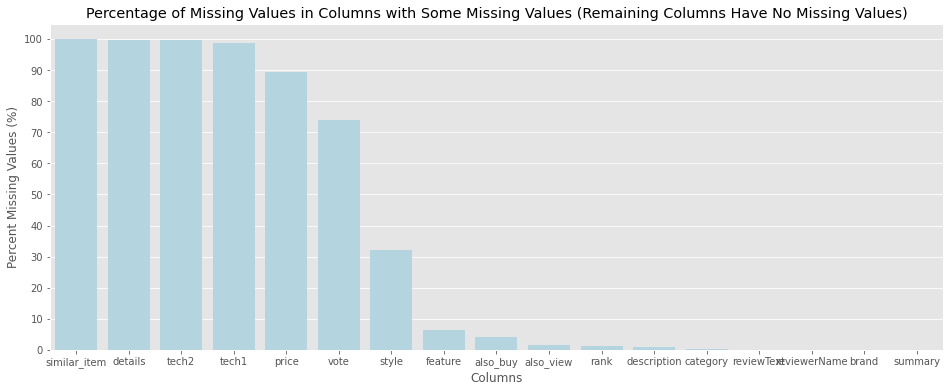

In [185]:
percentMissing = df.isnull().sum() * 100 / len(df)
dfMissing = pd.DataFrame({'Column Name': df.columns, 'Percent Missing': percentMissing})

dfMissing = dfMissing.sort_values('Percent Missing', ascending=[False])
dfMissing.reset_index(drop=True, inplace=True)

columnsWithMissingData = []

for col in dfMissing['Column Name'].tolist():
  if dfMissing[dfMissing['Column Name'] == col]['Percent Missing'].values[0] > 0:
    columnsWithMissingData.append([col, dfMissing[dfMissing['Column Name'] == col]['Percent Missing'].values[0]])
  

plt.figure(figsize=(16,6))

sns.barplot(y=list(map(list, zip(*columnsWithMissingData)))[1], 
            x=list(map(list, zip(*columnsWithMissingData)))[0],
            color='lightblue')

plt.yticks(np.arange(0, 110, 10))
# plt.xticks(rotation=45)
matplotlib.rcParams.update({'font.size': 10})
plt.xlabel('Columns')
plt.ylabel('Percent Missing Values (%)')
plt.title('Percentage of Missing Values in Columns with Some Missing Values (Remaining Columns Have No Missing Values)')
plt.savefig('/content/drive/My Drive/Applied_ML/images/missing.png', bbox_inches='tight');

In [186]:
df['overall'].isna().sum()

0

We see that there are no rows with missing data in 'overall' 

In [187]:
df['overall'].value_counts()

5.0    61743
4.0    21018
3.0    10645
1.0     5315
2.0     4641
Name: overall, dtype: int64

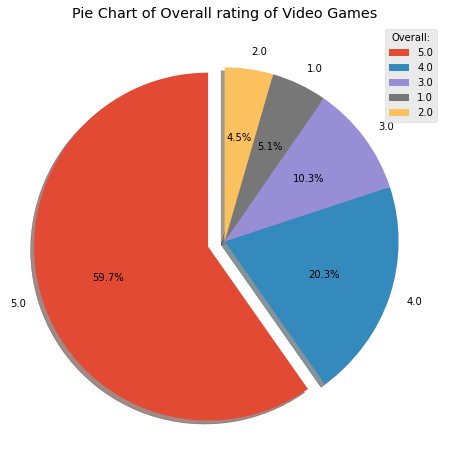

In [188]:
labels = [5.0, 4.0, 3.0, 1.0, 2.0]
values = list(df.overall.value_counts())

fig = plt.figure(figsize =(8, 8))
explode = (0.1, 0, 0, 0, 0) 
plt.pie(values, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Pie Chart of Overall rating of Video Games")
plt.legend(title = "Overall:")

plt.show()

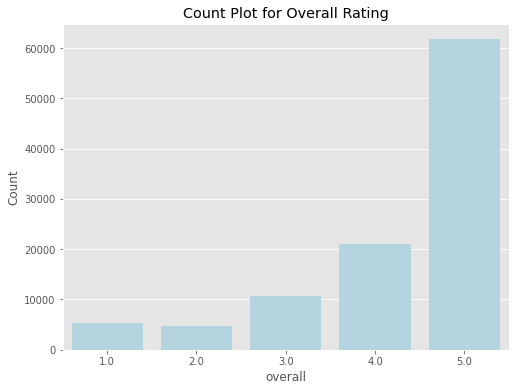

In [189]:
fig = plt.figure(figsize=(8,6))

sns.countplot(x=df['overall'], 
              order=[1.0, 2.0, 3.0, 4.0, 5.0],
              color='lightblue')


plt.xlabel('overall')
plt.ylabel('Count')
plt.title('Count Plot for Overall Rating')
plt.savefig('/content/drive/My Drive/Applied_ML/images/overall.png', bbox_inches='tight');

In [190]:
y = df['overall'].value_counts()
n = len(df)

cat = [1.0, 2.0, 3.0, 4.0, 5.0]

for label in cat:
  print('Percentage of {} overall ratings: {}'.format(label, round((y[label]/n)*100, 2)))


Percentage of 1.0 overall ratings: 5.14
Percentage of 2.0 overall ratings: 4.49
Percentage of 3.0 overall ratings: 10.3
Percentage of 4.0 overall ratings: 20.33
Percentage of 5.0 overall ratings: 59.73


We can see that the 'overall' column is imbalanced with majority category as $5.0$. We should keep this in mind while building our model.

In [191]:
df['verified'].isna().sum()

0

We can see that there are no rows with missing data in 'verified' column. This means that for each review, we know whether or not it is verified by Amazon.

In [192]:
df['verified'].value_counts()

True     57227
False    46135
Name: verified, dtype: int64

We can see that 'verified' is a boolean column that hold the value True if the review is verified, else False.



Let us try to analyse the propotions of verified and not verified reviews for each of the overall ratings.

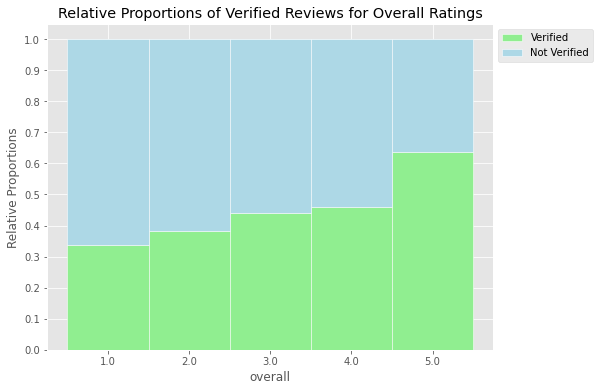

In [193]:
table = df[['overall', 'verified']].groupby(by=['overall', 'verified']).verified.count().unstack()
table = table.div(table.sum(axis='columns'), axis='index')

plt.figure(figsize=(8,6))
n_bars = [1, 2, 3, 4, 5]

plt.bar(n_bars, table[True], color='lightgreen', edgecolor='white', width=1.0, label='Verified')
plt.bar(n_bars, table[False], bottom=table[True], color='lightblue', edgecolor='white', width=1.0, label='Not Verified')


plt.xticks(n_bars, [1.0, 2.0, 3.0, 4.0, 5.0])
plt.yticks(np.arange(0, 1.1, .1))
matplotlib.rcParams.update({'font.size': 10})
plt.xlabel('overall')
plt.ylabel('Relative Proportions')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Relative Proportions of Verified Reviews for Overall Ratings')
plt.savefig('/content/drive/My Drive/Applied_ML/images/overallVersusVerified.png', bbox_inches='tight');

From this, we can see that for all overall ratings (except for $5.0$), the proportion of verified and not verified reviews are more or less the same, with verified reviews present in majority.

We can also observe that as rating increases, the proportion of verified reviews increases as well.

In [194]:
df['reviewerID'].isna().sum()

0

We can see that every review is associated with a reviewer.

In [195]:
f"There are {df['reviewerID'].nunique():,} reviewers in our dataset"

'There are 5,921 reviewers in our dataset'

In [196]:
df['reviewerID'].value_counts()

A3V6Z4RCDGRC44    417
AJKWF4W7QD4NS     355
A29BQ6B90Y1R5F    307
A2QHS1ZCIQOL7E    271
A119Q9NFGVOEJZ    193
                 ... 
A36GRI6CBO2L5N     10
A3F2K5I10EZHF4     10
A1QZDBM4YPUMKX     10
APDK39G2PUQPU      10
A4BK54P0D1GOS      10
Name: reviewerID, Length: 5921, dtype: int64

Hence, the top three reviewers are: 

In [197]:
print('Most Reviews by: {} - - - ID# {} - - - Total Reviews: {}\n'.format(df[df['reviewerID'] == 'A3V6Z4RCDGRC44']['reviewerName'].unique()[0], 'A3V6Z4RCDGRC44', 417))
print('2nd Most Reviews by: {} - - - ID# {} - - - Total Reviews: {}\n'.format(df[df['reviewerID'] == 'AJKWF4W7QD4NS']['reviewerName'].unique()[0], 'AJKWF4W7QD4NS', 355))
print('3rd Most Reviews by: {} - - - ID# {} - - - Total Reviews: {}\n'.format(df[df['reviewerID'] == 'A29BQ6B90Y1R5F']['reviewerName'].unique()[0], 'A29BQ6B90Y1R5F', 307))
print('4th Most Reviews by: {} - - - ID# {} - - - Total Reviews: {}\n'.format(df[df['reviewerID'] == 'A2QHS1ZCIQOL7E']['reviewerName'].unique()[0], 'A2QHS1ZCIQOL7E', 271))
print('5th Most Reviews by: {} - - - ID# {} - - - Total Reviews: {}\n'.format(df[df['reviewerID'] == 'A119Q9NFGVOEJZ']['reviewerName'].unique()[0], 'A119Q9NFGVOEJZ', 193))


Most Reviews by: Lisa Shea - - - ID# A3V6Z4RCDGRC44 - - - Total Reviews: 417

2nd Most Reviews by: N. Durham - - - ID# AJKWF4W7QD4NS - - - Total Reviews: 355

3rd Most Reviews by: Tsanche - - - ID# A29BQ6B90Y1R5F - - - Total Reviews: 307

4th Most Reviews by: Richard Baker - - - ID# A2QHS1ZCIQOL7E - - - Total Reviews: 271

5th Most Reviews by: Ivan Orozco - - - ID# A119Q9NFGVOEJZ - - - Total Reviews: 193



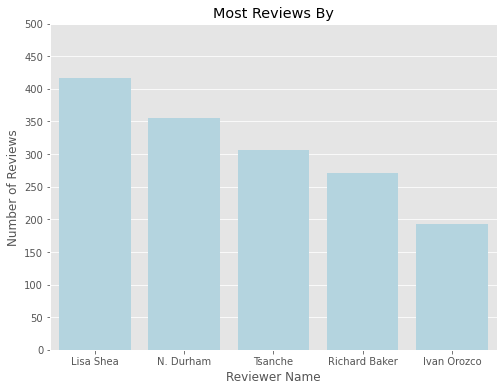

In [198]:
topReviewers = [['Lisa Shea', 417], ['N. Durham', 355], ['Tsanche', 307], ['Richard Baker', 271], ['Ivan Orozco', 193]]
topReviewers = list(map(list, zip(*topReviewers)))

plt.figure(figsize=(8,6))

sns.barplot(x=topReviewers[0], y=topReviewers[1], color='lightblue')

plt.yticks(np.arange(0, 550, 50))
matplotlib.rcParams.update({'font.size': 10})
plt.xlabel('Reviewer Name')
plt.ylabel('Number of Reviews')
plt.title('Most Reviews By')
plt.savefig('/content/drive/My Drive/Applied_ML/images/mostReviewsBy.png', bbox_inches='tight');

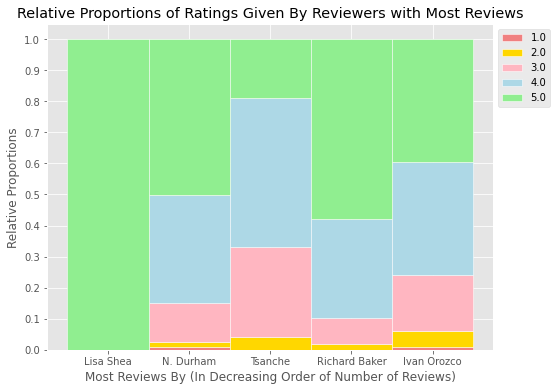

In [199]:
subset = df[df['reviewerID'].isin(['A3V6Z4RCDGRC44', 'AJKWF4W7QD4NS', 'A29BQ6B90Y1R5F', 'A2QHS1ZCIQOL7E', 'A119Q9NFGVOEJZ'])]
table = subset.groupby(by=['reviewerID', 'overall']).overall.count().unstack()
table = table.fillna(0)
table = table.div(table.sum(axis='columns'), axis='index')

plt.figure(figsize=(8,6))
n_bars = [1, 2, 3, 4, 5]
labels = ['Lisa Shea', 'N. Durham', 'Tsanche', 'Richard Baker', 'Ivan Orozco']

plt.bar(n_bars, table[1.0], color='lightcoral', edgecolor='white', width=1.0, label='1.0')
plt.bar(n_bars, table[2.0], bottom=table[1.0], color='gold', edgecolor='white', width=1.0, label='2.0')
plt.bar(n_bars, table[3.0], bottom=table[[1.0, 2.0]].sum(axis='columns'), color='lightpink', edgecolor='white', width=1.0, label='3.0')
plt.bar(n_bars, table[4.0], bottom=table[[1.0, 2.0, 3.0]].sum(axis='columns'), color='lightblue', edgecolor='white', width=1.0, label='4.0')
plt.bar(n_bars, table[5.0], bottom=table[[1.0, 2.0, 3.0, 4.0]].sum(axis='columns'), color='lightgreen', edgecolor='white', width=1.0, label='5.0')

plt.xticks(n_bars, labels)
plt.yticks(np.arange(0, 1.1, .1))
matplotlib.rcParams.update({'font.size': 10})
plt.xlabel('Most Reviews By (In Decreasing Order of Number of Reviews)')
plt.ylabel('Relative Proportions')
plt.title('Relative Proportions of Ratings Given By Reviewers with Most Reviews')


plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.savefig('/content/drive/My Drive/Applied_ML/images/overallVersusMostReviewsBy.png', bbox_inches='tight');

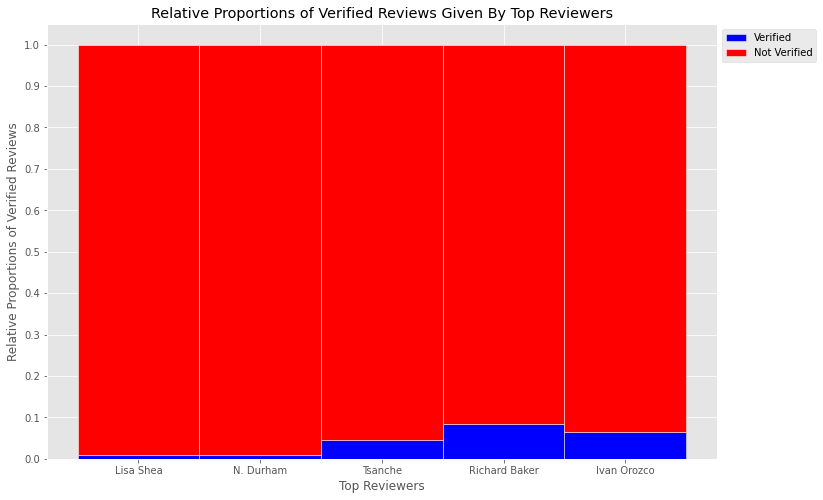

In [200]:
table = subset.groupby(by=['reviewerID', 'verified']).verified.count().unstack()
table = table.div(table.sum(axis='columns'), axis='index')

plt.figure(figsize=(12,8))
n_bars = [1, 2, 3, 4, 5]
labels = ['Lisa Shea', 'N. Durham', 'Tsanche', 'Richard Baker', 'Ivan Orozco']

plt.bar(n_bars, table[True], color='blue', edgecolor='white', width=1.0, label='Verified')
plt.bar(n_bars, table[False], bottom=table[True], color='red', edgecolor='white', width=1.0, label='Not Verified')

plt.xticks(n_bars, labels)
plt.yticks(np.arange(0, 1.1, .1))
plt.xlabel('Top Reviewers')
plt.ylabel('Relative Proportions of Verified Reviews')
plt.title('Relative Proportions of Verified Reviews Given By Top Reviewers')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1);

We can see that most of the reviews given by top reviewers are not verified by amazon.

In [201]:
df['asin'].isna().sum()

0

Hence, each review in our dataset is associated with a product.

Let us now analyse the most reviewed products

In [202]:
df['title'].value_counts().index.values[0:10]

array(['The Last of Us Remastered - PlayStation 4',
       "Uncharted 4: A Thief's End - PlayStation 4", 'Diablo III',
       'Killzone: Shadow Fall (PlayStation 4)',
       'Destiny - Standard Edition - PlayStation 4', "Assassin's Creed",
       'Bloodborne', "Assassin's Creed - Playstation 3",
       "Uncharted: Drake's Fortune - Playstation 3",
       "Assassin's Creed Unity Limited Edition - PlayStation 4"],
      dtype=object)

In [203]:
(df['title'] ==' ').sum()

0

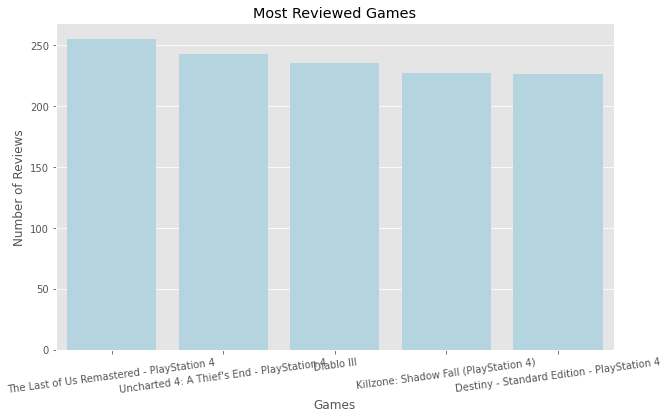

In [204]:
mostReviewedProducts = list(df['title'].value_counts().index.values[0:5])
subset = df[df['title'].isin(mostReviewedProducts)]

plt.figure(figsize=(10,6))

sns.countplot(x=subset['title'], order=mostReviewedProducts, color='lightblue')
plt.xticks(rotation=7.5)
matplotlib.rcParams.update({'font.size': 10})
plt.ylabel('Number of Reviews')
plt.xlabel('Games')
plt.title('Most Reviewed Games')
plt.savefig('/content/drive/My Drive/Applied_ML/images/mostReviewedGames.png', bbox_inches='tight');

In [205]:
mostReviewedProducts = list(df['title'].value_counts().index.values[0:5])
subset = df[df['title'].isin(mostReviewedProducts)]

table = subset.groupby(by=['title', 'overall']).overall.count().unstack()
table = table.div(table.sum(axis='columns'), axis='index')
table

overall,1.0,2.0,3.0,4.0,5.0
title,,,,,
Destiny - Standard Edition - PlayStation 4,0.163717,0.128319,0.185841,0.168142,0.353982
Diablo III,0.140426,0.102128,0.136170,0.195745,0.425532
Killzone: Shadow Fall (PlayStation 4),0.066079,0.105727,0.171806,0.224670,0.431718
The Last of Us Remastered - PlayStation 4,0.035294,0.023529,0.035294,0.054902,0.850980
Uncharted 4: A Thief's End - PlayStation 4,0.032922,0.008230,0.061728,0.135802,0.761317


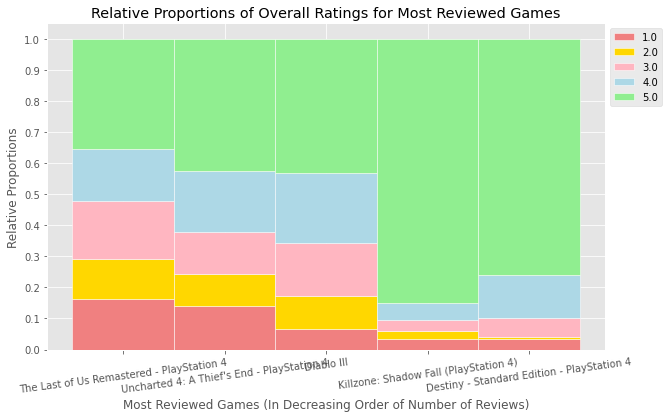

In [206]:
mostReviewedProducts = list(df['title'].value_counts().index.values[0:5])
subset = df[df['title'].isin(mostReviewedProducts)]

table = subset.groupby(by=['title', 'overall']).overall.count().unstack()
table = table.fillna(0)
table = table.div(table.sum(axis='columns'), axis='index')

plt.figure(figsize=(10,6))
n_bars = [1, 2, 3, 4, 5]
labels = mostReviewedProducts

plt.bar(n_bars, table[1.0], color='lightcoral', edgecolor='white', width=1.0, label='1.0')
plt.bar(n_bars, table[2.0], bottom=table[1.0], color='gold', edgecolor='white', width=1.0, label='2.0')
plt.bar(n_bars, table[3.0], bottom=table[[1.0, 2.0]].sum(axis='columns'), color='lightpink', edgecolor='white', width=1.0, label='3.0')
plt.bar(n_bars, table[4.0], bottom=table[[1.0, 2.0, 3.0]].sum(axis='columns'), color='lightblue', edgecolor='white', width=1.0, label='4.0')
plt.bar(n_bars, table[5.0], bottom=table[[1.0, 2.0, 3.0, 4.0]].sum(axis='columns'), color='lightgreen', edgecolor='white', width=1.0, label='5.0')


plt.xticks(n_bars, labels)
plt.xticks(rotation=7.5)
plt.yticks(np.arange(0, 1.1, .1))
matplotlib.rcParams.update({'font.size': 10})
plt.xlabel('Most Reviewed Games (In Decreasing Order of Number of Reviews)')
plt.ylabel('Relative Proportions')
plt.title('Relative Proportions of Overall Ratings for Most Reviewed Games')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.savefig('/content/drive/My Drive/Applied_ML/images/overallVersusMostReviwedGames.png', bbox_inches='tight');

In [207]:
table = df[['title', 'overall']].groupby(by=['title']).mean()
table.sort_values(by='overall', ascending=[False])

,overall
title,
Xbox 360 Wireless Controller with Transforming D-Pad and Play and Charge Kit - Black,5.000000
Tekken - Dark Resurrection - Sony PSP,5.000000
HDE Charging Cable for PS3 Controllers USB Charging Cord Compatible with Wireless DualShock 3 Controllers,5.000000
Pokemon Stadium 2,5.000000
Rome: Total War - PC,5.000000
...,...
Deer Drive Legends 3DS,2.100000
Back to the Future,2.100000
Command &amp; Conquer 4: Tiberian Twilight [Download],1.818182


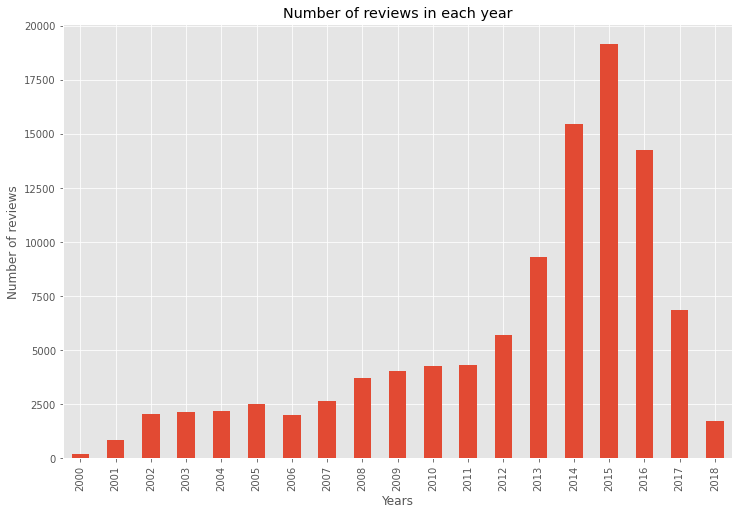

In [208]:
plt.figure(figsize=(12,8))
df.reviewTime.dt.year.value_counts().sort_index().plot(kind='bar', xlabel = 'Years', ylabel = 'Number of reviews', title = 'Number of reviews in each year');



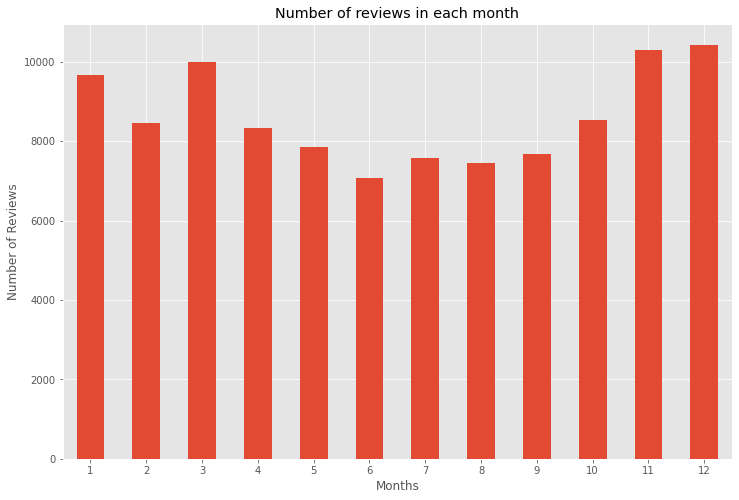

In [209]:
plt.figure(figsize=(12,8))
df.reviewTime.dt.month.value_counts().sort_index().plot(kind='bar', rot = 0, xlabel = 'Months', ylabel = 'Number of Reviews', title = 'Number of reviews in each month');


Because these have too many missing values, we'll drop them

In [210]:
df = df.drop(['style','vote', 'price', 'tech1', 'tech2'], axis = 1)